In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [5]:
df.iloc[3]["comment_text"]

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [6]:
df[df.columns[2:]].iloc[3]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 3, dtype: int64

In [7]:
df[df["toxic"]==1].head(15)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
44,001956c382006abd,I'm Sorry \n\nI'm sorry I screwed around with ...,1,0,0,0,0,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0
58,0021fe88bc4da3e6,My Band Page's deletion. You thought I was gon...,1,0,1,0,0,0


In [8]:
from tensorflow.keras.layers import TextVectorization

In [9]:
X = df["comment_text"]
y = df[df.columns[2:]].values

In [10]:
MAX_FEATUERS =200000

In [11]:
vectorizer = TextVectorization(max_tokens = MAX_FEATUERS, output_sequence_length=1800, output_mode="int")

In [12]:
vectorizer.adapt(X.values)

In [13]:
vectorizer("hi, how are you?")[:7]

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([171,  73,  20,   7,   0,   0,   0], dtype=int64)>

In [14]:
vectorized_text = vectorizer(X.values)

In [15]:
len(X)

159571

In [16]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [17]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(16000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [21]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

Creating the model layers

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense,Embedding 

In [26]:
model = Sequential()
model.add(Embedding(MAX_FEATUERS+1, 32))
model.add(Bidirectional(LSTM(32, activation="tanh")))

model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))

model.add(Dense(6, activation="sigmoid"))

In [28]:
model.compile(loss="BinaryCrossentropy", optimizer="Adam")

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [30]:
histroy= model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 6927s 992ms/step - loss: 0.0619 - val_loss: 0.0480


<Figure size 800x500 with 0 Axes>

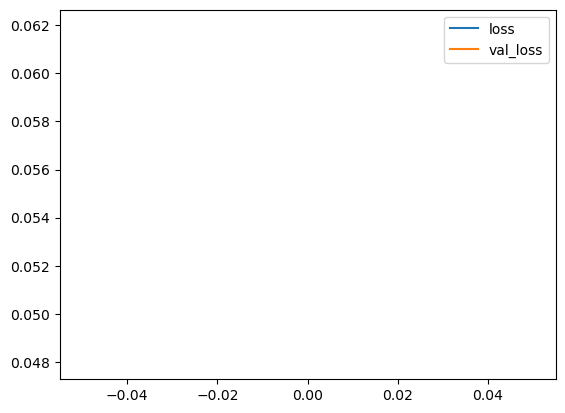

In [33]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(histroy.history).plot()
plt.show()

In [55]:
input_text = vectorizer("fuck you bitch")

In [62]:
input_text.shape

TensorShape([1800])

In [61]:
np.array([input_text]).shape

(1, 1800)

In [63]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([139,   7, 762, ...,   0,   0,   0], dtype=int64)>

In [64]:
np.array([input_text])

array([[139,   7, 762, ...,   0,   0,   0]], dtype=int64)

In [65]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [59]:
model.predict(np.array([input_text]))

1/1 [==============================] - 0s 79ms/step


array([[0.99989974, 0.56776065, 0.99611825, 0.0066745 , 0.9447319 ,
        0.07461482]], dtype=float32)